In [50]:
# Import necessary libraries
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [51]:
os.chdir("C:\\Users\\junos\\OneDrive\\Documents\\PythonScripts")

print(os.getcwd())

C:\Users\junos\OneDrive\Documents\PythonScripts


In [52]:
# Load the dataset
data_path = 'netflix_data.csv' 
netflix_data = pd.read_csv(data_path)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [53]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [54]:
netflix_data.describe()


,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [55]:
# Extract numerical duration by converting "minutes" or "Seasons" into numeric values
def extract_duration(duration):
    if 'Season' in duration:
        return 1  # Treat 1 season as a duration of 1 for simplicity
    elif 'Seasons' in duration:
        return int(duration.split()[0])
    else:
        return int(duration.split()[0])  # for minutes

netflix_data['duration_minutes'] = netflix_data['duration'].apply(extract_duration)

# Encoding categorical variables: 'type' and 'rating'
le_type = LabelEncoder()
le_rating = LabelEncoder()

netflix_data['type_encoded'] = le_type.fit_transform(netflix_data['type'])
netflix_data['rating_encoded'] = le_rating.fit_transform(netflix_data['rating'].fillna('Unknown'))

# Selecting features for clustering
features = netflix_data[['type_encoded', 'release_year', 'rating_encoded', 'duration_minutes']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
netflix_data['cluster'] = kmeans.fit_predict(scaled_features)

# Display clustering result
netflix_data[['title', 'type', 'release_year', 'rating', 'duration', 'cluster']].head()

,title,type,release_year,rating,duration,cluster
0,Norm of the North: King Sized Adventure,Movie,2019,TV-PG,90 min,4
1,Jandino: Whatever it Takes,Movie,2016,TV-MA,94 min,4
2,Transformers Prime,TV Show,2013,TV-Y7-FV,1 Season,1
3,Transformers: Robots in Disguise,TV Show,2016,TV-Y7,1 Season,1
4,#realityhigh,Movie,2017,TV-14,99 min,0


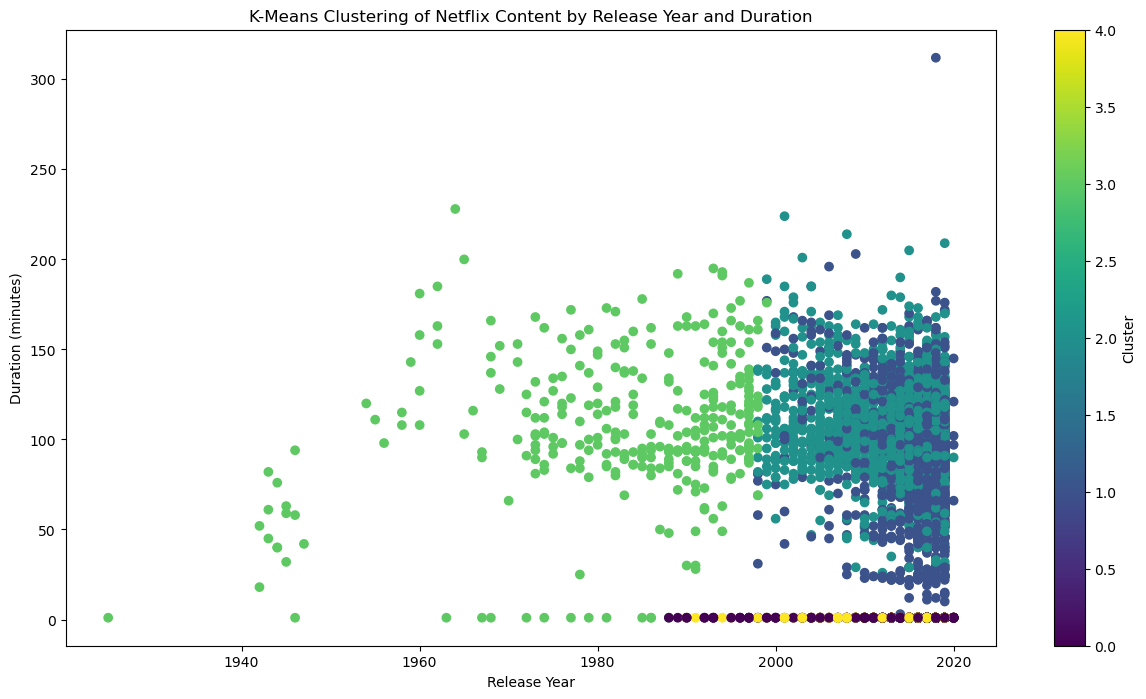

In [56]:

# Implement K-Means Clustering
def apply_kmeans(scaled_features, n_clusters=50):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = kmeans.fit_predict(scaled_features)
    return clusters, kmeans

# Visualize Results
def visualize_clusters(data, clusters):
    # Adding clusters to data for visualization
    data['cluster'] = clusters
    
    # Plotting clusters by release year and duration
    plt.figure(figsize=(15, 8))
    plt.scatter(data['release_year'], data['duration_minutes'], c=data['cluster'], cmap='viridis')
    plt.colorbar(label='Cluster')
    plt.xlabel('Release Year')
    plt.ylabel('Duration (minutes)')
    plt.title('K-Means Clustering of Netflix Content by Release Year and Duration')
    plt.show()

# Step 5: Run the K-Means Application
def main(filepath):
    data = load_data(filepath)
    scaled_features, data = preprocess_data(data)
    clusters, kmeans_model = apply_kmeans(scaled_features, n_clusters=5)
    visualize_clusters(data, clusters)

# Specify the path to your dataset
if __name__ == "__main__":
    main('netflix_data.csv')